In [2]:
#1. Importing Libraries

#functional libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#scikit learn libraries

#clustering
from sklearn.cluster import KMeans, DBSCAN, OPTICS, AgglomerativeClustering
# from sklearn_extra.cluster import KMedoids

#pre-processing
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler

#scoring
from sklearn.metrics import silhouette_score 

#outlier removal
from scipy.stats import zscore



#warnings filter
import warnings

warnings.filterwarnings('ignore')

In [3]:
#versions being used
print(f"Numpy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")


Numpy version: 2.3.2
Pandas version: 2.3.0


In [4]:
#file_path variable to escape unicode error
file_path = r"C:\Users\BAPS\Desktop\Python\Datasets\CC GENERAL.csv"

df = pd.read_csv(file_path)

In [5]:
#getting the first 5 rows of the dataframe

df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
#shape of the dataframe

df.shape

(8950, 18)

In [7]:
#getting summary of the dataset using info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
#columns names

df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [9]:
#getting statistical overview of the numerical cols

df.describe().T



,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


CUST_ID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases (

BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFF_PURCHASES : Maximum purchase amount done in one-go

INSTALLMENTS_PURCHASES : Amount of purchase done in installment

CASH_ADVANCE : Cash in advance given by the user

PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASES_TRX : Numbe of purchase transactions made

CREDIT_LIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

In [10]:
#getting statistical overview of the object cols

df.describe(include='object').T



,count,unique,top,freq
CUST_ID,8950,8950,C10001,1


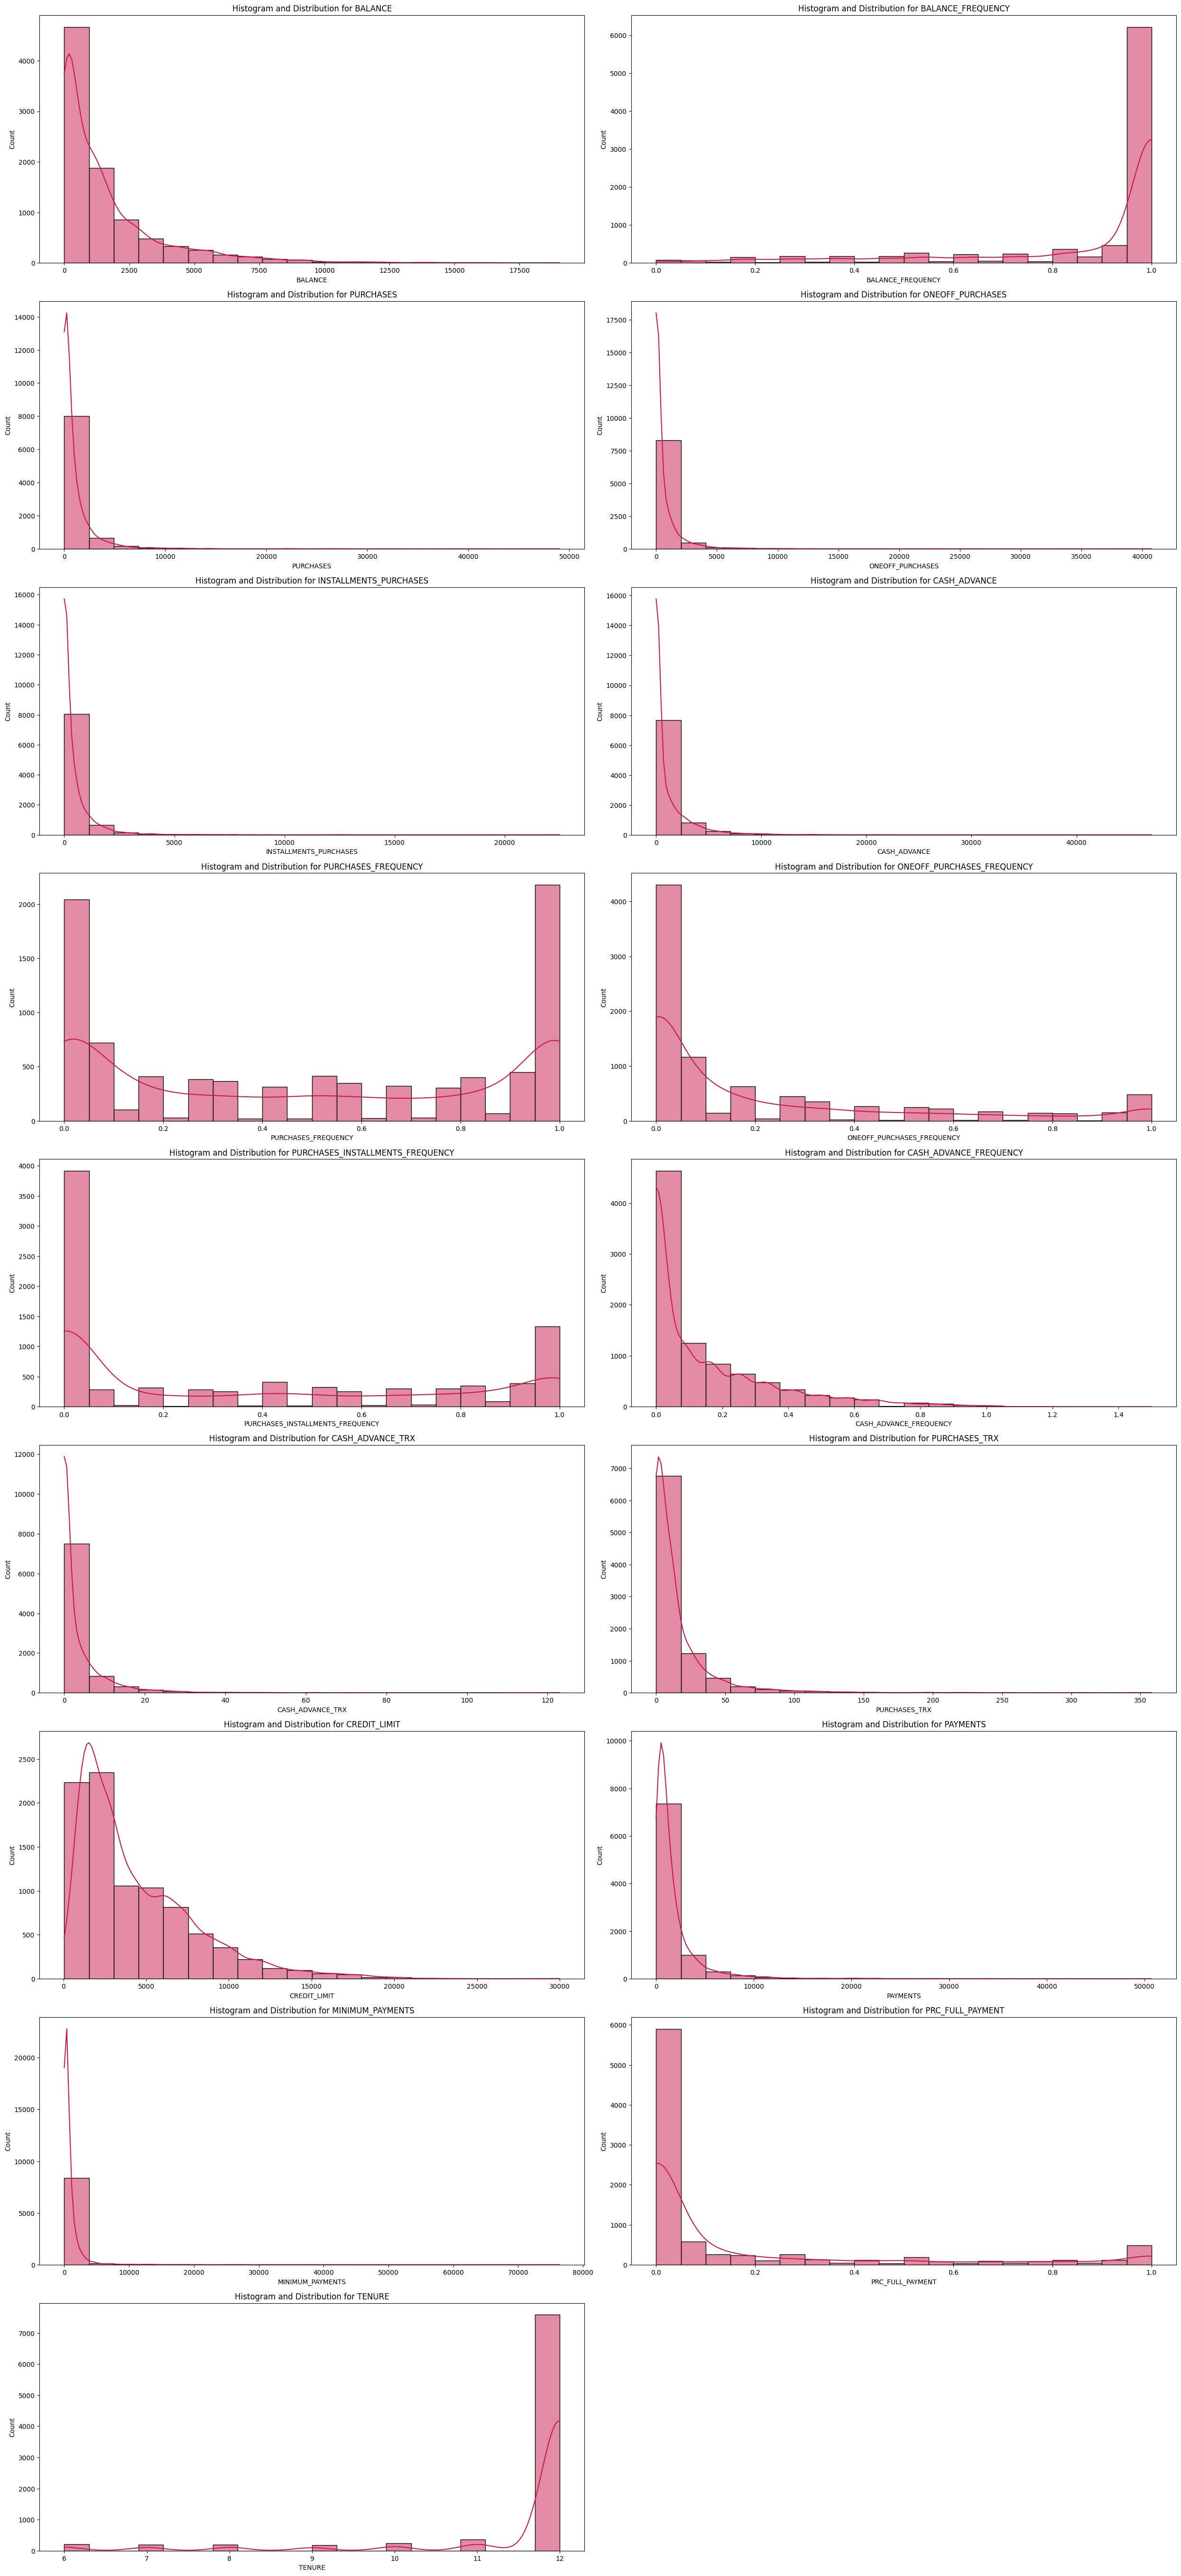

In [11]:
#Visualizing Distributions for each numerical column

palette = ["#590d22","#800f2f","#a4133c","#c9184a","#ff4d6d","#ff758f","#ff8fa3","#ffb3c1","#ffccd5","#fff0f3"]
#selecting only numerical columns
num_cols = df.select_dtypes(include=np.number).columns


#Visualizing using Seaborn
plt.figure(figsize=(25,60))
for i, col in enumerate(df[num_cols].columns, 1):
    plt.subplot(10, 2, i)
    sns.histplot(data=df, x=col, kde=True, bins=20, color=palette[3])
    plt.title(f"Histogram and Distribution for {col}")
   
plt.tight_layout()
plt.show()


As we can see from the visualization:

    > There are multiple outlier in multiple columns as seen from the distribution

    > There is need to perform transformation on the columns

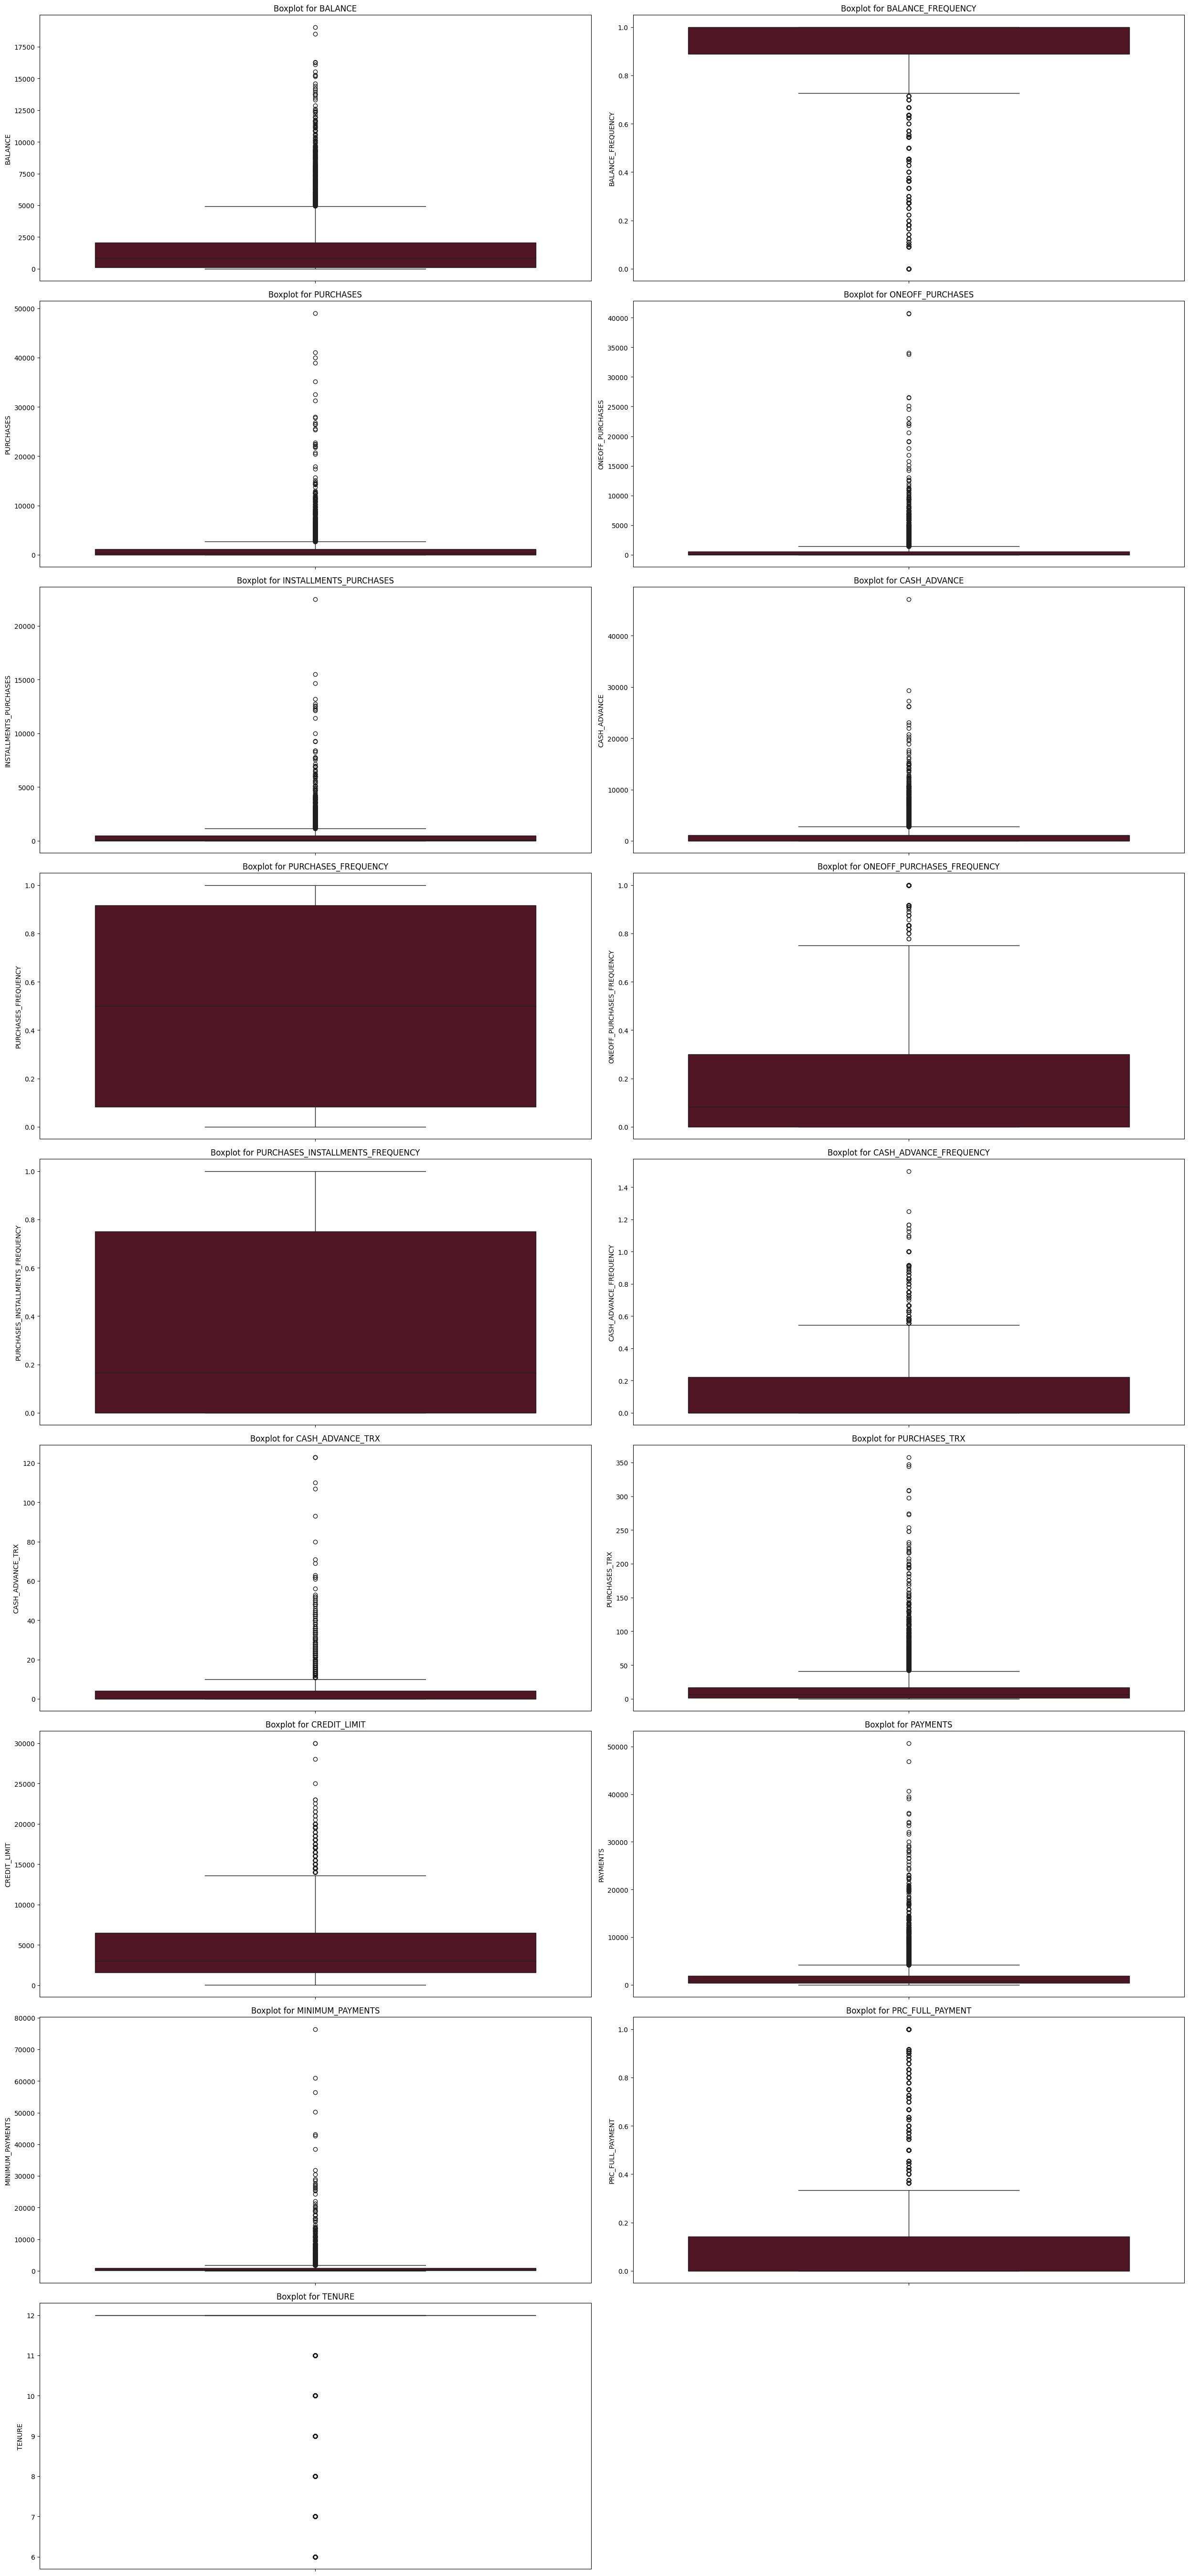

In [12]:

#Visualizing Boxplots using Seaborn for numerical data
plt.figure(figsize=(25,60))
for i, col in enumerate(df[num_cols].columns, 1):
    plt.subplot(10, 2, i)
    sns.boxplot(y=col, data=df, palette=palette)
    plt.title(f"Boxplot for {col}")

plt.tight_layout()
plt.show()


# #plt.figure()
# for i, col in enumerate(df[num_cols].columns, 1):
#     plt.subplot(10,2,i)

In [13]:
# Check Skewness and Kurtosisto check if data require scaling/transformation or not.

skew = df[num_cols].skew()
print("\nSkew\n")
print(skew)

print("\nKurt\n")
kurt = df[num_cols].kurt()
print(kurt)

# Observation : Skew and Kurt values are in range -3 to 3 then no need to have a transformation.


Skew

BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522464
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.622797
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

Kurt

BALANCE                               7.674751
BALANCE_FREQUENCY                     3.092370
PURCHASES                           111.388771
ONEOFF_PURCHASES                    164.187572
I

In [13]:
# Outlier Removal : Z-Score method
print("before outliers removal",df.shape)
numeric_df = df.select_dtypes(include = [np.number])
z_scores = zscore(numeric_df)
print(z_scores)
threshold = 3
 
outliers_mask = (np.abs(z_scores )> threshold).any(axis = 1)
outliers = numeric_df[outliers_mask]
clean_dataset = numeric_df[~outliers_mask]
print("after applying zscore method",clean_dataset.shape)

before outliers removal (8950, 18)
[[-0.73198937 -0.24943448 -0.42489974 ...         nan -0.52555097
   0.36067954]
 [ 0.78696085  0.13432467 -0.46955188 ...         nan  0.2342269
   0.36067954]
 [ 0.44713513  0.51808382 -0.10766823 ...         nan -0.52555097
   0.36067954]
 ...
 [-0.7403981  -0.18547673 -0.40196519 ...         nan  0.32919999
  -4.12276757]
 [-0.74517423 -0.18547673 -0.46955188 ...         nan  0.32919999
  -4.12276757]
 [-0.57257511 -0.88903307  0.04214581 ...         nan -0.52555097
  -4.12276757]]
after applying zscore method (7574, 17)


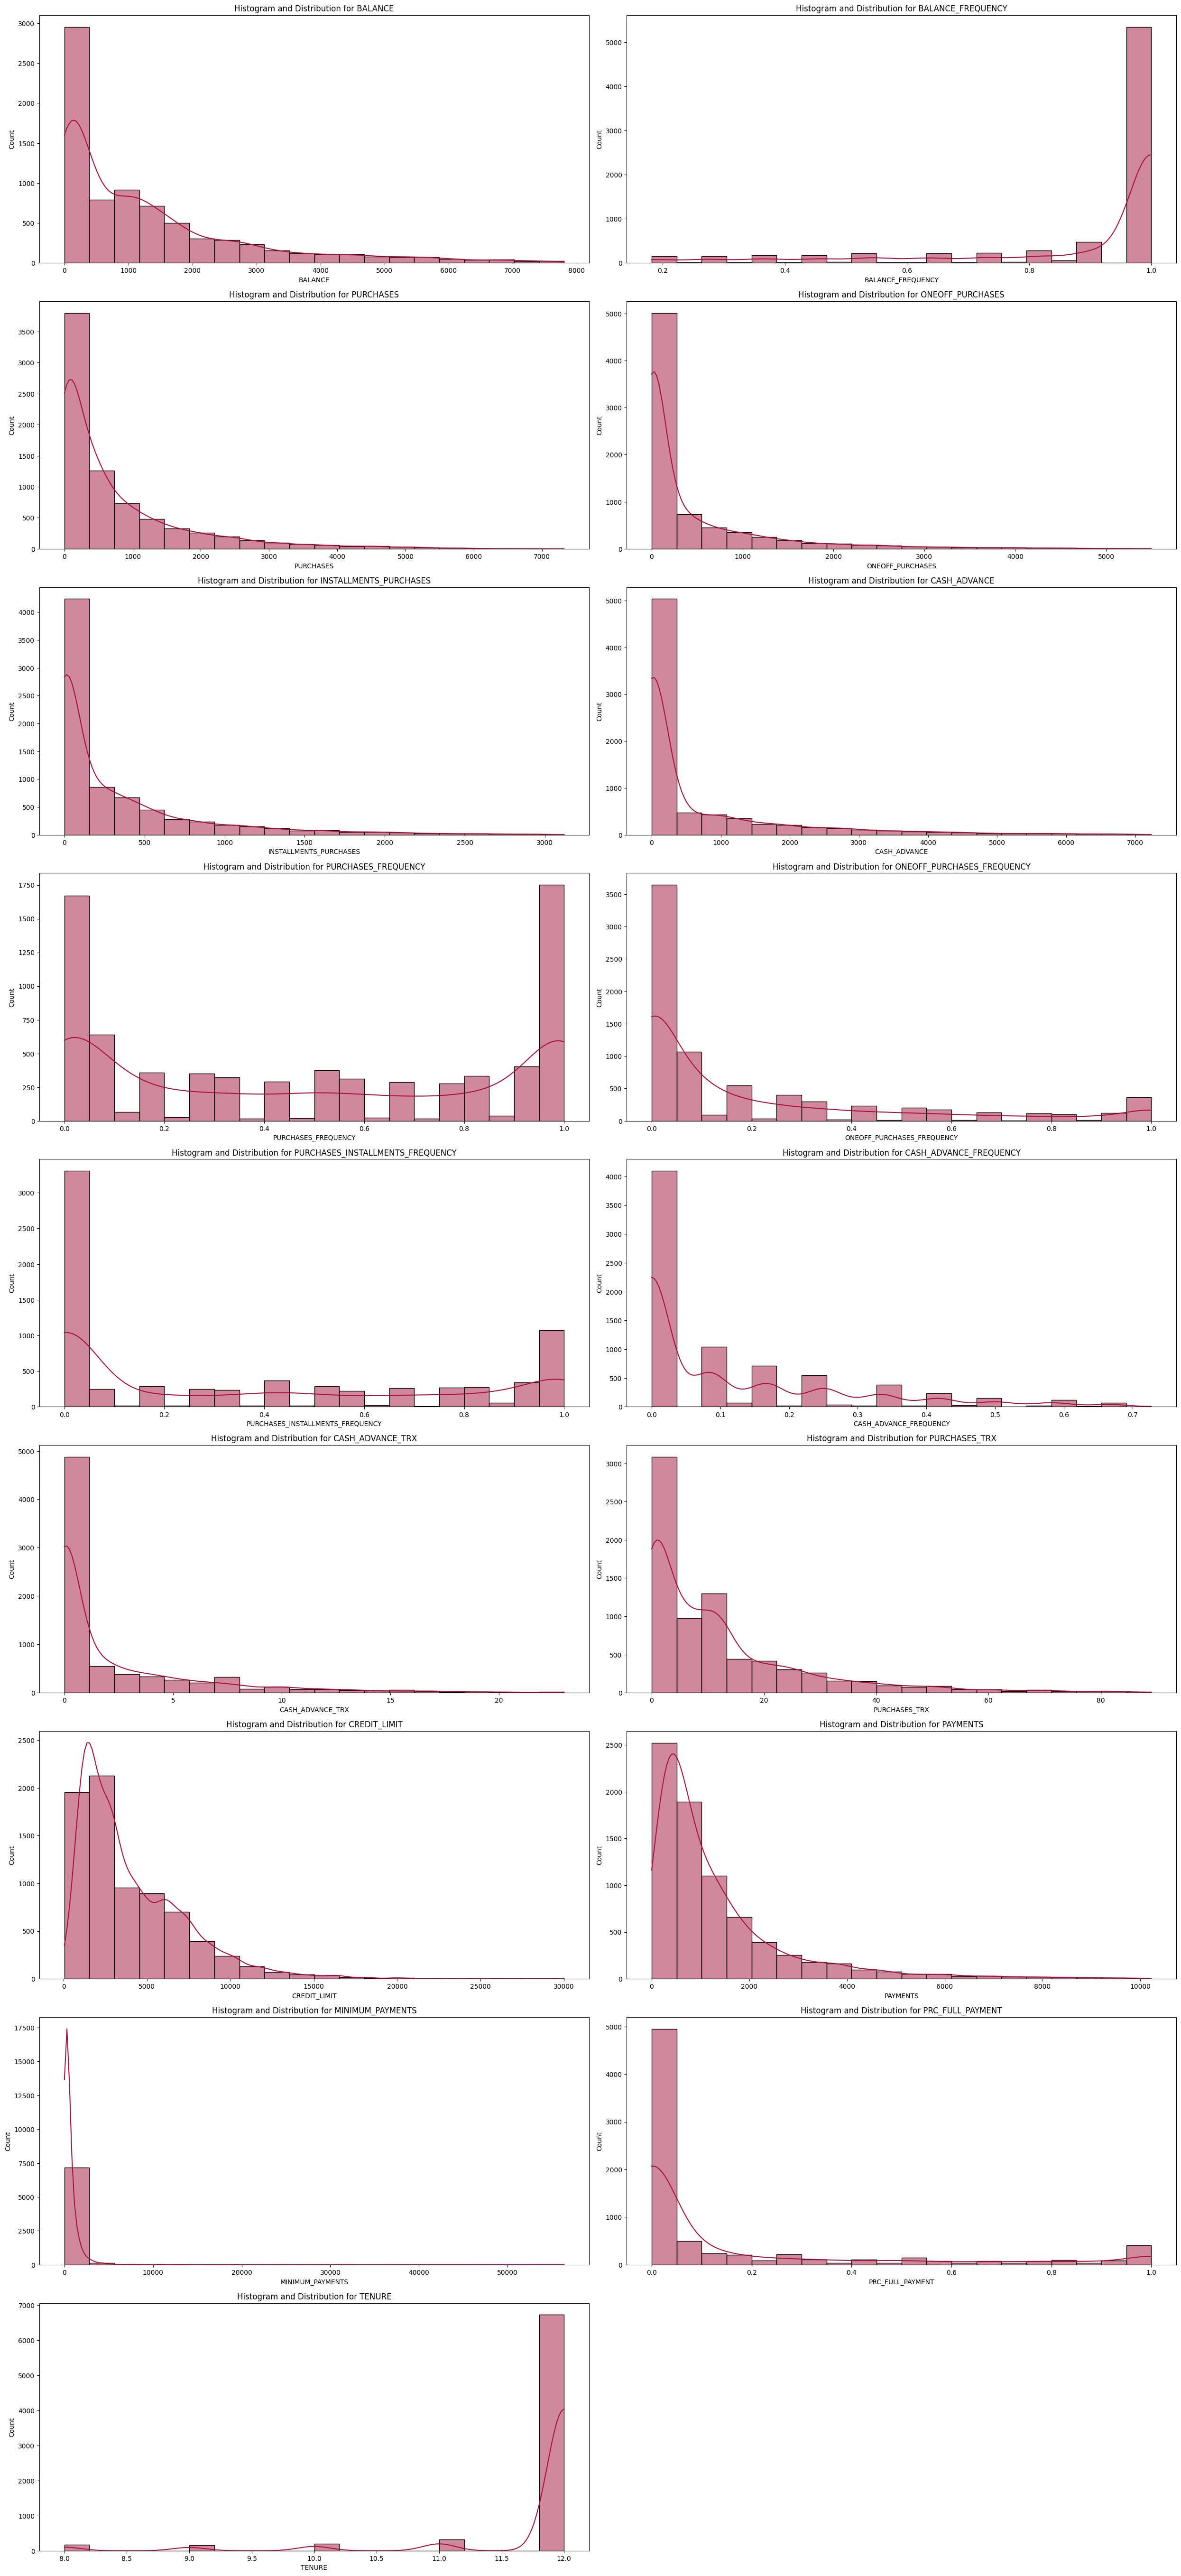

In [15]:
#Visualizing Distributions for each numerical column

palette = ["#590d22","#800f2f","#a4133c","#c9184a","#ff4d6d","#ff758f","#ff8fa3","#ffb3c1","#ffccd5","#fff0f3"]
#selecting only numerical columns
num_cols = df.select_dtypes(include=np.number).columns


#Visualizing using Seaborn
plt.figure(figsize=(25,60))
for i, col in enumerate(clean_dataset[num_cols].columns, 1):
    plt.subplot(10, 2, i)
    sns.histplot(data=clean_dataset, x=col, kde=True, bins=20, color=palette[2])
    plt.title(f"Histogram and Distribution for {col}")
   
plt.tight_layout()
plt.show()


In [14]:

skew = clean_dataset[num_cols].skew()
print("\nSkew\n")
print(skew)


Skew

BALANCE                              1.726441
BALANCE_FREQUENCY                   -1.963227
PURCHASES                            2.193705
ONEOFF_PURCHASES                     2.743266
INSTALLMENTS_PURCHASES               2.256323
CASH_ADVANCE                         2.419286
PURCHASES_FREQUENCY                  0.077666
ONEOFF_PURCHASES_FREQUENCY           1.625743
PURCHASES_INSTALLMENTS_FREQUENCY     0.538775
CASH_ADVANCE_FREQUENCY               1.558392
CASH_ADVANCE_TRX                     2.308843
PURCHASES_TRX                        1.991010
CREDIT_LIMIT                         1.514328
PAYMENTS                             2.432864
MINIMUM_PAYMENTS                    11.845131
PRC_FULL_PAYMENT                     1.921348
TENURE                              -3.509536
dtype: float64


In [15]:
print("\nKurt\n")
kurt = clean_dataset[num_cols].kurt()
print(kurt)


Kurt

BALANCE                               2.823111
BALANCE_FREQUENCY                     2.696463
PURCHASES                             5.581186
ONEOFF_PURCHASES                      8.630592
INSTALLMENTS_PURCHASES                5.586519
CASH_ADVANCE                          6.097277
PURCHASES_FREQUENCY                  -1.612367
ONEOFF_PURCHASES_FREQUENCY            1.536745
PURCHASES_INSTALLMENTS_FREQUENCY     -1.346031
CASH_ADVANCE_FREQUENCY                1.754545
CASH_ADVANCE_TRX                      5.701341
PURCHASES_TRX                         4.444050
CREDIT_LIMIT                          3.091102
PAYMENTS                              7.354393
MINIMUM_PAYMENTS                    203.993414
PRC_FULL_PAYMENT                      2.360666
TENURE                               11.790840
dtype: float64


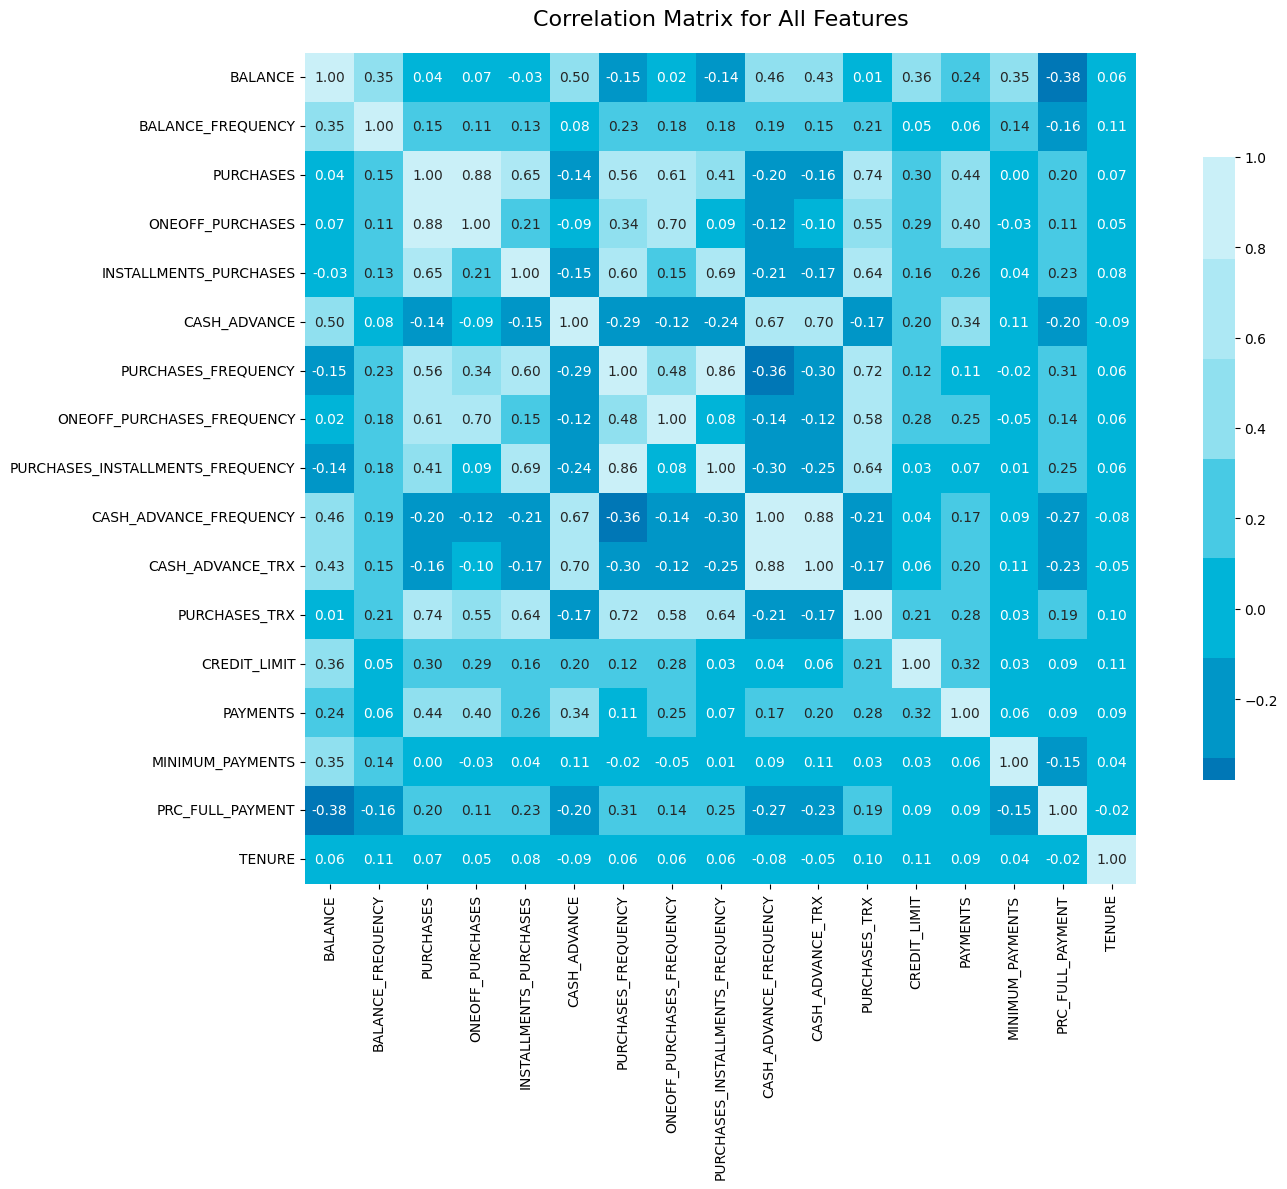

In [16]:
#Checking Correlation in the Data and Generating a Heatmap

#using the corr function on the dataframe
corr = clean_dataset.corr()

#setting the color palette
heatmap_pal =["#03045e","#023e8a","#0077b6","#0096c7","#00b4d8","#48cae4","#90e0ef","#ade8f4","#caf0f8"]

#visualizing the correlation plot
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap=heatmap_pal,
    center=0,
    square=True,
    cbar_kws={"shrink": 0.75}
)
plt.title("Correlation Matrix for All Features", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [17]:
#dropping columns that wont be needed

clean_dataset.drop(['MINIMUM_PAYMENTS'], axis=1, inplace=True)

In [18]:
# Convert column names to lowercase and replace spaces with underscores
clean_dataset.columns = clean_dataset.columns.str.lower().str.replace(' ', '_')


print(clean_dataset.columns)


Index(['balance', 'balance_frequency', 'purchases', 'oneoff_purchases',
       'installments_purchases', 'cash_advance', 'purchases_frequency',
       'oneoff_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
       'credit_limit', 'payments', 'prc_full_payment', 'tenure'],
      dtype='object')


In [19]:
df = clean_dataset.copy()

In [20]:
#as there are some marginal outlier values in the dataset we will be implementing robust scaling as in oppise to standardscaling

scaler = RobustScaler()

df_scaled = scaler.fit_transform(df)

In [21]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)


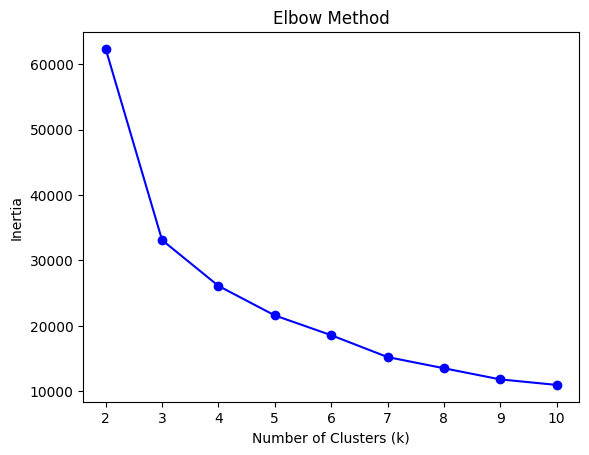

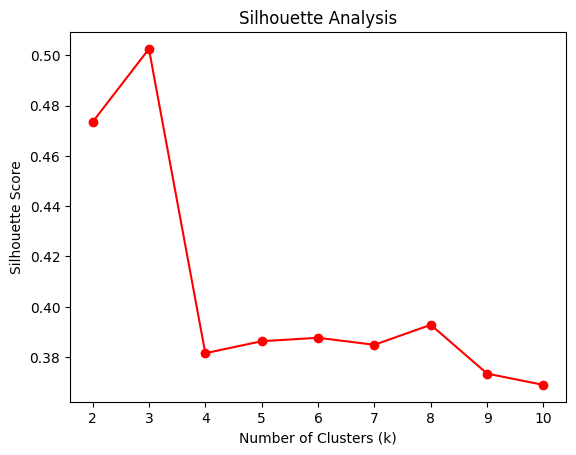

In [22]:
#Finding the optimal K value

inertias = []
sil_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_pca, labels))

# Plot elbow curve
plt.plot(K, inertias, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# Plot silhouette scores
plt.plot(K, sil_scores, 'ro-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()

In [23]:

kmeans = KMeans(n_clusters=3, random_state=42, n_init=100)
labels = kmeans.fit_predict(df_scaled)
df['Cluster'] = labels

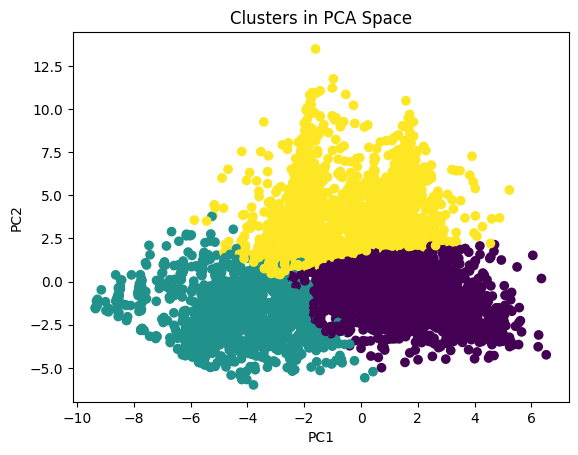

In [24]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters in PCA Space")
plt.show()

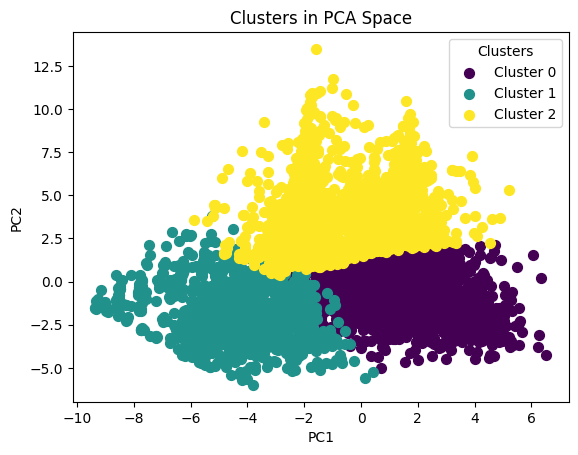

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Unique cluster labels
unique_labels = np.unique(labels)

# Choose a colormap
cmap = plt.get_cmap('viridis', len(unique_labels))

# Plot each cluster separately for legend
for cluster in unique_labels:
    plt.scatter(X_pca[labels==cluster, 0], 
                X_pca[labels==cluster, 1],
                s=50, 
                color=cmap(cluster),
                label=f'Cluster {cluster}')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters in PCA Space")
plt.legend(title="Clusters")
plt.show()


In [26]:
# # from sklearn_extra.cluster import KMedoids
# kmedoids = KMedoids(n_clusters=3, metric='euclidean', random_state=42)
# medoids = kmedoids.fit_predict(X_pca)
# # medoids
# # plt.figure(figsize=(10, 6))
# # scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=medoids)
# # plt.colorbar(scatter)
# # plt.title('KMedoids Clustering Result')
# # plt.xlabel('Feature 1')
# # plt.ylabel('Feature 2')
# # plt.show()


# # Unique clusters
# unique_labels = np.unique(medoids)

# # Colormap
# cmap = plt.get_cmap('viridis', len(unique_labels))

# plt.figure(figsize=(10, 6))

# # Plot each cluster separately for legend
# for cluster in unique_labels:
#     plt.scatter(X_pca[medoids==cluster, 0],
#                 X_pca[medoids==cluster, 1],
#                 s=50,
#                 color=cmap(cluster),
#                 label=f'Cluster {cluster}')

# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('K-Medoids Clustering Result')
# plt.legend(title="Clusters")
# plt.show()

In [27]:
features =['balance', 'purchases', 
        'cash_advance', 'purchases_frequency',
       'oneoff_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
       'credit_limit', 'payments', 'prc_full_payment']

cluster_summary = df.groupby('Cluster')[features].agg(['mean', 'std']).round(2)

In [28]:
cluster_summary

balance          purchases          cash_advance           \
            mean      std      mean      std         mean      std   
Cluster                                                              
0        1702.62  1594.32    389.75   481.64       925.84  1387.36   
1         146.70   304.32    378.72   498.91       365.97   935.43   
2         944.34  1393.02   2090.44  1328.89       168.70   594.17   

        purchases_frequency       oneoff_purchases_frequency        ...  \
                       mean   std                       mean   std  ...   
Cluster                                                             ...   
0                      0.39  0.38                       0.12  0.21  ...   
1                      0.31  0.28                       0.08  0.13  ...   
2                      0.90  0.16                       0.48  0.37  ...   

        cash_advance_trx       purchases_trx        credit_limit           \
                    mean   std          mean    std         mean      std   
Cluster                                                                     
0                   3.28  4.42          7.64   9.64      3691.83  2825.19   
1                   0.89  2.35          5.30   6.66      3792.89  3163.64   
2                   0.60  2.05         29.95  18.77      5529.59  3726.95   

        payments          prc_full_payment        
            mean      std             mean   std  
Cluster                                           
0        1132.60  1292.94             0.03  0.08  
1        1020.97  1470.75             0.26  0.35  
2        2005.61  1612.96             0.43  0.39  

[3 rows x 24 columns]

From cluster summary we can deduce the properties of each cluster and divide them on the same basis.

In [29]:
df

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,prc_full_payment,tenure,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8876,121.294493,0.750000,385.26,385.26,0.00,169.554775,0.500000,0.500000,0.000000,0.125000,3,7,500.0,98.225317,0.000000,8,0
8877,55.147722,0.875000,163.31,0.00,163.31,0.000000,0.875000,0.000000,0.750000,0.000000,0,7,1000.0,62.619008,0.000000,8,0
8878,869.328293,0.750000,0.00,0.00,0.00,1153.925205,0.000000,0.000000,0.000000,0.125000,3,0,1200.0,150.755024,0.000000,8,0
8879,137.744895,1.000000,441.00,0.00,441.00,0.000000,0.750000,0.000000,0.625000,0.000000,0,6,1000.0,169.249683,0.000000,8,0


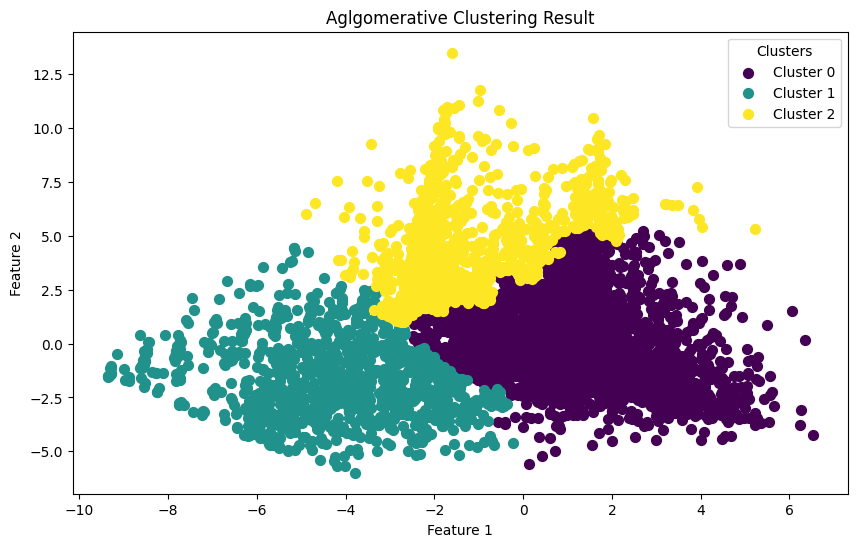

In [30]:
from sklearn.cluster import AgglomerativeClustering
# Initialize the Agglomerative Clustering algorithm
agg_clustering = AgglomerativeClustering(n_clusters=3)

# Fit the model and predict cluster labels
y_agg = agg_clustering.fit_predict(X_pca)

# Unique clusters
unique_labels = np.unique(y_agg)

# Colormap
cmap = plt.get_cmap('viridis', len(unique_labels))

plt.figure(figsize=(10, 6))

# Plot each cluster separately for legend
for cluster in unique_labels:
    plt.scatter(X_pca[y_agg==cluster, 0],
                X_pca[y_agg==cluster, 1],
                s=50,
                color=cmap(cluster),
                label=f'Cluster {cluster}')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Aglgomerative Clustering Result')
plt.legend(title="Clusters")
plt.show()